In [1]:
# import required libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
from PIL import Image


In [2]:
## INPUT ## (change paths before running the code)
data_path = './data/archive/tiff' # main path to data
n_tiles_per_image = 2 # create 10 tiles per image for the tiling
seed = 42 # seed for reproducibility
random.seed(seed) # set the seed to replicate data if needed

# training input and labels paths
X_train_path = os.path.join(data_path, 'train') # path to train data
y_train_path = os.path.join(data_path, 'train_labels') # path to train data

# validation input and labels paths
X_val_path = os.path.join(data_path, 'val') # path to test data
y_val_path = os.path.join(data_path, 'val_labels') # path to test data

# testing input and labels paths
X_test_path = os.path.join(data_path, 'test') # path to test data
y_test_path = os.path.join(data_path, 'test_labels') # path to test data

In [3]:
def loadXY(X_path, y_path):
  """
  loadXY Loads the input images located in X_path (in the returned variable X),
  and their corresponding labels y from y_path (if they exist).

  Input:
  X_path: the path of the input images.
  y_path: the path of the labels.

  Output:
  X: the input images.
  y: the corresponding labels of X.
  """

  X = [] # intialize the input images list
  y = [] # intialize the labels

  for f in os.listdir(X_path):
    # load X[i]
    if f.endswith('.tiff'):
      X.append(plt.imread(os.path.join(X_path, f)))

    else:
      raise Exception("One of the files is not a tiff file!")

    # check if the label exists, load it if it does
    if os.path.exists(os.path.join(y_path, f[:-5]+".tif")):
      y.append(plt.imread(os.path.join(y_path, f[:-5]+".tif")))
    else:
      raise Exception("One of the input images has not a pre-defined label...")

  return X, y

In [4]:
X_train, y_train = loadXY(X_train_path, y_train_path) # load the training images and their labels
X_val, y_val = loadXY(X_val_path, y_val_path) # load the validation images and their labels
X_test, y_test = loadXY(X_test_path, y_test_path) # load the test images and their labels

The shape of the training images is:  (1108, 1500, 1500, 3)
The shape of each image is:  (1500, 1500, 3)
The shape of each label is:  (1500, 1500)


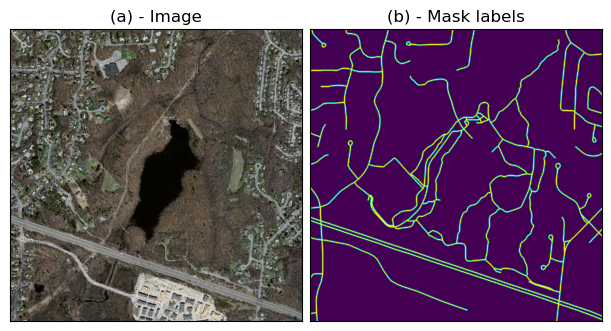

In [8]:
## Test images loading ##

print("The shape of the training images is: ", np.array(X_train).shape)
fig_example_data = plt.figure(figsize = (6,6), constrained_layout = True)
plt.subplot(1,2,1)
plt.imshow(X_train[0]) # show the first image
plt.title("(a) - Image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
plt.subplot(1,2,2)
plt.imshow(y_train[0]) # show the first image's label
plt.title("(b) - Mask labels")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
print("The shape of each image is: ", X_train[0].shape)
print("The shape of each label is: ", y_train[0].shape)

In [9]:
def tileImageAndLabel(X,y, n_tiles: int = 50, tile_size: int = 512, seed = 42):
  """
  tileImageAndLabel This function creates n_tiles tile using an image X and its
  corresponding label y.
  """

  # check if the tile size is acceptable
  if tile_size >= X.shape[1] or tile_size >= X.shape[0]:
    print(X.shape)
    raise Exception("The tile size is bigger than the image size!")



  # initialize random positions of tiles
  tile_absc = random.sample(range(0, X.shape[0]-tile_size), n_tiles)
  tile_ord = random.sample(range(0, X.shape[1]-tile_size), n_tiles)

  # perform the tiling, set the outputs in arrays X_tiles, y_tiles
  X_tiles = []
  y_tiles = []

  for tile_index in range(n_tiles):
    X_tiles.append(X[tile_absc[tile_index]:tile_absc[tile_index]+tile_size, tile_ord[tile_index]:tile_ord[tile_index]+tile_size, :])
    y_tiles.append(y[tile_absc[tile_index]:tile_absc[tile_index]+tile_size, tile_ord[tile_index]:tile_ord[tile_index]+tile_size])

  return np.array(X_tiles), np.array(y_tiles)



In [10]:
def tileImageAndLabelSet(X,y, n_tiles: int = 50, tile_size: int = 512, seed = 42):
  """
  tileImageAndLabelSet This function creates n_tiles tile using each image
  X[i,:,:,:] and its corresponding label y, from the set of images X and their
  labels y.
  """

  X_tiles = []
  y_tiles = []
  for i in range(len(X)):
    X_tiles_i, y_tiles_i = tileImageAndLabel(X[i], y[i],
                                             n_tiles = n_tiles,
                                             tile_size = tile_size,
                                             seed = seed)
    X_tiles.append(X_tiles_i)
    y_tiles.append(y_tiles_i)

  return np.array(X_tiles).reshape(-1,tile_size,tile_size,3), np.array(y_tiles).reshape(-1,tile_size,tile_size)

In [17]:
# Testing the tiling on the first image

X0_tiled, y0_tiled = tileImageAndLabel(X_train[0],y_train[0], tile_size = 512)


# Example of tile #35
plt.subplot(2,2,1)
plt.imshow(X0_tiled[22])
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

plt.subplot(2,2,2)
plt.imshow(y0_tiled[22])
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

# Example of tile 25
plt.subplot(2,2,3)
plt.imshow(X0_tiled[25])
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])


plt.subplot(2,2,4)
plt.imshow(y0_tiled[25], cmap = "grey")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])


(512, 512, 3)


Exception: The tile size is bigger than the image size!

In [12]:
# Tile/Crop training trainig images (2/image)
X_train, y_train = tileImageAndLabelSet(X_train,y_train, n_tiles = n_tiles_per_image) # getting n_tiles_per_image tiles per image

In [18]:
# Write cropped training images
if not os.path.exists("train"):
    os.mkdir("train")
if not os.path.exists("train/images"):
    os.mkdir("train/images")
if not os.path.exists("train/labels"):
    os.mkdir("train/labels")
for i in range(X_train.shape[0]):
    cv2.imwrite(os.path.join("train","images",f'train_{i}.png'), X_train[i])
    cv2.imwrite(os.path.join("train","labels",f'train_{i}.png'), y_train[i])

In [19]:
# Tile/Crop training validation images (5 tiles/image)
X_val, y_val = tileImageAndLabelSet(X_val,y_val, n_tiles = 5) # getting n_tiles_per_image tiles per image

In [21]:
# Write cropped validation images
if not os.path.exists("val"):
    os.mkdir("val")
if not os.path.exists("val/images"):
    os.mkdir("val/images")
if not os.path.exists("val/labels"):
    os.mkdir("val/labels")
for i in range(X_val.shape[0]):
    cv2.imwrite(os.path.join("val","images",f'val_{i}.png'), X_val[i])
    cv2.imwrite(os.path.join("val","labels",f'val_{i}.png'), y_val[i])

In [22]:
# Tile/Crop test test images (5 tiles/image)
X_test, y_test = tileImageAndLabelSet(X_test,y_test, n_tiles = 10) # getting n_tiles_per_image tiles per image

In [23]:
# Write cropped test images
if not os.path.exists("test"):
    os.mkdir("test")
if not os.path.exists("test/images"):
    os.mkdir("test/images")
if not os.path.exists("test/labels"):
    os.mkdir("test/labels")
for i in range(X_val.shape[0]):
    cv2.imwrite(os.path.join("test","images",f'test_{i}.png'), X_test[i])
    cv2.imwrite(os.path.join("test","labels",f'test_{i}.png'), y_test[i])

In [ ]:
from google.colab.patches import cv2_imshow
zoom_factor = 4  # e.g., 2x zoom

# Zoom by resizing
zoomed_img = cv2.resize(X_train[0], None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

cv2_imshow(zoomed_img)

In [ ]:
def flipHoriz(X):
  """
  flipHoriz Flips an image X horizontally.
  """
  return cv2.flip(X, 1)  # 1 means horizontal flip

In [ ]:
def flipHorizSet(X,y, prop_flip = 0.2):
  """
  flipHorizSet Flips a set of images X and their labels y horizontally. Not all
  images of X are flipped, but only a fraction of them 'prop_flip'.
  """
  # create a boolean array for flip or not
  flip = np.random.rand(len(X)) < prop_flip

  # intialize lists of new images
  X_flip = []
  y_flip = []

  # flip each input image and its corresponding label
  for i in range(len(X)):
    if flip[i]:
      X_flip.append(flipHoriz(X[i]))
      y_flip.append(flipHoriz(y[i]))
    else:
      X_flip.append(X[i])
      y_flip.append(y[i])

  return np.array(X_flip), np.array(y_flip)

In [ ]:
X_train_flipped, y_train_flipped = flipHorizSet(X_train,y_train)
print(X_train_flipped.shape)

In [ ]:
# TEST flip #

## Before flipping
fig_example_flipping = plt.figure(figsize = (6,6), constrained_layout = True)
plt.subplot(2,2,1)
plt.imshow(X_train[0]) # show the first image
plt.title("(a) - Image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
plt.subplot(2,2,2)
plt.imshow(y_train[0]) # show the first image's label
plt.title("(b) - Mask labels")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

## Flipping
X_train_flipped, y_train_flipped = flipHorizSet(X_train,y_train, prop_flip = 1.0)

## After flipping
plt.subplot(2,2,3)
plt.imshow(X_train_flipped[0]) # show the first image
plt.title("(a) - Flipped image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])
plt.subplot(2,2,4)
plt.imshow(y_train_flipped[0]) # show the first image's label
plt.title("(b) - Flipped mask labels")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

In [ ]:
def blurImage(X, blur_intensity: int = 10):
  """
  blurImage Blurs an image X.
  """
  if blur_intensity > 20:
    print("WARNING: The blurring intensity is capped at 20...")
    blur_intensity = 20
  return cv2.blur(X,(blur_intensity//2,blur_intensity//2)) # applies average blurring.

In [ ]:
def blurImageSet(X, prop_blur = 0.2, blur_intensity: int = 10):
  """
  blurImageSet Blurs a set of images X. Not all images of X are blurred, but
  only a fraction of them 'prop_blur'.
  """
  X_blur = []
  for i in range(len(X)):
    if np.random.rand() < prop_blur:
      X_blur.append(blurImage(X[i], blur_intensity = blur_intensity))
    else:
      X_blur.append(X[i])
  return np.array(X_blur)

In [ ]:
# TEST blur #

## Before blurring
fig_example_blurring = plt.figure(figsize = (6,6), constrained_layout = True)
plt.subplot(1,2,1)
plt.imshow(X_train[0]) # show the first image
plt.title("(a) - Image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

## Blurring
X_train_blurred = blurImageSet(X_train, prop_blur = 1.0, blur_intensity = 14)

## After blurring
plt.subplot(1,2,2)
plt.imshow(X_train_blurred[0]) # show the first image's label
plt.title("(b) - Blurred image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

In [ ]:
def colorJitterImage(X, brightness = 0.5, contrast = 0.5, saturation = 0.5, hue = 0.2):
  """
  colorJitterImage Applies color jitter to an image X.
  """
  img_pil = Image.fromarray(X)
  import torchvision.transforms as t
  transform = t.ColorJitter(
    brightness = brightness,  # Adjust brightness by a factor
    contrast = contrast,    # Adjust contrast
    saturation = saturation,  # Adjust saturation
    hue = hue          # Adjust hue
    )

  return np.array(transform(img_pil))

In [ ]:
def colorJitterImageSet(X, prop_jitter = 0.2, brightness = 0.5, contrast = 0.5, saturation = 0.5, hue = 0.2):
  """
  colotJitterImageSet Applies color jitter to a set of images X. Not all images of
  X are blurred, but only a fraction of them 'jitter_prop'.
  """
  X_jitter = [] # intialize color jittered images list
  for i in range(len(X)):
    if np.random.rand() < prop_jitter: # if less than jitter_prop,
      X_jitter.append(colorJitterImage(X[i], brightness = brightness, contrast = contrast, saturation = saturation, hue = hue))
  return np.array(X_jitter)

In [ ]:
# TEST Color Jitter #

## Before jitter
fig_example_cjitter = plt.figure(figsize = (6,6), constrained_layout = True)
plt.subplot(1,2,1)
plt.imshow(X_train[0]) # show the first image
plt.title("(a) - Image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

## Blurring
X_train_cjittered = colorJitterImageSet(X_train, prop_jitter = 1.0)

## After blurring
plt.subplot(1,2,2)
plt.imshow(X_train_cjittered[0]) # show the first image's label
plt.title("(b) - Color-jittered image")
ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_yticklabels([])

print(X_train_cjittered.shape)

In [ ]:
def normalizeDivMax(X):
  """
  normalizeDivMax This function divides all pixels of the images X by 255 to normlize.
  """
  return X/255.0

In [ ]:
# Test normalize
X_norm = normalizeDivMax(X_train)
print(X_norm)